In [86]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [87]:
survey_data = pd.read_csv("survey_results_public.csv")

In [109]:
columns_interest = ['DevType', 'LanguageHaveWorkedWith']


profile_insterest = ["Data scientist or machine learning specialist", 
                     "Data or business analyst", 
                     "Engineer, data"]

# Select Languages of interest: Python, SQL, R
languages_of_interest = ['Python', 'SQL', 'R']


def get_languages_interest(data, languages_of_interest):

    # Get the columns of interest
    data = data[columns_interest]

    # Get the rows of interest
    data = data[data['DevType'].isin(profile_insterest)]

    # Remove rows with Language Have Work With Column having Nan
    data.dropna(subset=['LanguageHaveWorkedWith'], how='all', inplace=True)

    candidate_languages = list(st_data.LanguageHaveWorkedWith.values)
    
    # Split strings of languages into list of list of languages
    list_all_languages = [languages.split(";") for languages in candidate_languages]

    # Combine all the lists
    final_languages = list(itertools.chain.from_iterable(list_all_languages))


    # Create final list of languages of interest
    list_languages = [lang for lang in final_languages if lang in languages_of_interest]  
    
    return list_languages


def compute_stats_languages(list_languages, languages_of_interest):
    
    final_stats = {}
    
    for lang in languages_of_interest:
        final_stats[lang] = list_languages.count(lang)
    
    return final_stats


def show_stats(stats):
    
    plt.xlabel("Number of occurences")
    plt.ylabel("Languages")
    plt.title("Most Used Languages by Data Professionals")
    
    plt.barh(*zip(*stats.items()))

In [110]:
list_languages =  get_languages_interest(survey_data, languages_of_interest)

In [111]:
stats = compute_stats_languages(list_languages, languages_of_interest)
stats

{'Python': 1127, 'SQL': 766, 'R': 320}

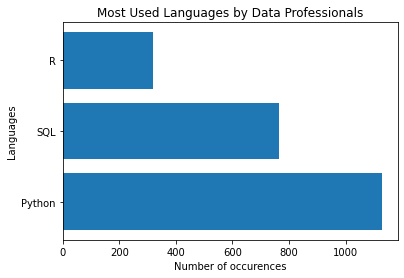

In [112]:
show_stats(stats)